# Theodolite Analysis - Plotting the Demand Metric

This notebook creates a plot, showing scalability as a function that maps load intensities to the resources required for processing them. It is able to combine multiple such plots in one figure, for example, to compare multiple systems or configurations.

The notebook takes a CSV file for each plot mapping load intensities to minimum required resources, computed by the `demand-metric-plot.ipynb` notebook.

First, we need to import some libraries, which are required for creating the plots.

In [9]:
import os
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

We need to specify the directory, where the demand CSV files can be found, and a dictionary that maps a system description (e.g. its name) to the corresponding CSV file (prefix). To use Unicode narrow non-breaking spaces in the description format it as `u"1000\u202FmCPU"`.

In [11]:
results_dir = '<path-to>/results'
plot_name = '<plot-name>'

experiments = {
    'System XYZ': 'exp200',
}


Now, we combie all systems described in `experiments`.

In [12]:
dataframes = [pd.read_csv(os.path.join(results_dir, f'{v}_demand.csv')).set_index('load').rename(columns={"resources": k}) for k, v in experiments.items()]

df = reduce(lambda df1,df2: df1.join(df2,how='outer'), dataframes)

We might want to display the mappings before we plot it.

In [13]:
df

,System XYZ
load,
50000,1


The following code creates a MatPlotLib figure showing the scalability plots for all specified systems. You might want to adjust its styling etc. according to your preferences. Make sure to also set a filename.

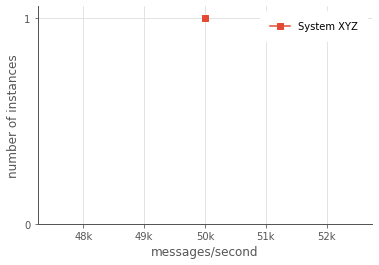

In [14]:
plt.style.use('ggplot')
plt.rcParams['pdf.fonttype'] = 42 # TrueType fonts
plt.rcParams['ps.fonttype'] = 42 # TrueType fonts
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='555555'
#plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='dddddd'
plt.rcParams['axes.spines.top']='false'
plt.rcParams['axes.spines.right']='false'
plt.rcParams['legend.frameon']='true'
plt.rcParams['legend.framealpha']='1'
plt.rcParams['legend.edgecolor']='1'
plt.rcParams['legend.borderpad']='1'

@FuncFormatter
def load_formatter(x, pos):
    return f'{(x/1000):.0f}k'

markers = ['s', 'D', 'o', 'v', '^', '<', '>', 'p', 'X']

def splitSerToArr(ser):
    return [ser.index, ser.as_matrix()]

plt.figure()
#plt.figure(figsize=(4.8, 3.6)) # For other plot sizes
#ax = df.plot(kind='line', marker='o')
for i, column in enumerate(df):
    plt.plot(df[column].dropna(), marker=markers[i], label=column)
plt.legend()
ax = plt.gca()
#ax = df.plot(kind='line',x='dim_value', legend=False, use_index=True)
ax.set_ylabel('number of instances')
ax.set_xlabel('messages/second')
ax.set_ylim(ymin=0)
#ax.set_xlim(xmin=0)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(FuncFormatter(load_formatter))

plt.savefig(results_dir + '/' + plot_name + '.pdf', bbox_inches='tight')